In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from astropy.io import fits
import numpy as np 

In [2]:
path = '/home/informatica/Downloads/R_mfmtk_A1_higher_0.05_photoplag_0-2.csv'
Dfl = pd.read_csv(path)
PR = Dfl[(Dfl['A1']>0.02) & (Dfl['PhotoFlag']<=2)]
PR

,# rootname800,ABG,A0,A1,A2,A3,A4,PhotoFlag,r_petro
0,SPLUS.STRIPE82-0002.22724.griz,0.115263,0.288551,0.204455,0.063075,0.272204,4.500327,2,13.98
1,SPLUS.STRIPE82-0003.09397.griz,0.032048,0.291407,0.054386,0.136456,0.214644,8.201118,2,15.92
2,SPLUS.STRIPE82-0005.10947.griz,0.062465,0.170208,0.100650,0.086876,0.171771,1.516342,2,13.79
3,SPLUS.STRIPE82-0005.15153.griz,0.076774,0.162158,0.084933,0.046183,0.221919,2.212030,0,14.10
4,SPLUS.STRIPE82-0005.23183.griz,0.053927,0.324261,0.153485,0.085386,0.154196,5.587840,2,14.49
...,...,...,...,...,...,...,...,...,...
346,SPLUS.STRIPE82-0166.18568.griz,0.153993,0.124805,0.062845,0.051869,0.245157,0.597573,2,14.08
347,SPLUS.STRIPE82-0166.29198.griz,0.031139,0.217600,0.116806,0.046637,0.113720,2.555427,2,14.55
348,SPLUS.STRIPE82-0167.45207.griz,0.066072,0.190378,0.072709,0.061937,0.222878,1.161675,0,14.91
349,SPLUS.STRIPE82-0169.05104.griz,0.066837,0.124415,0.059840,0.089312,0.185639,1.745787,0,13.83


In [0]:
PR = Dfl[(Dfl['A1']>0.02) & (Dfl['PhotoFlag']<=2)]
MA = PR.sort_values('A1', ascending=False)
NQ = MA[0:20]

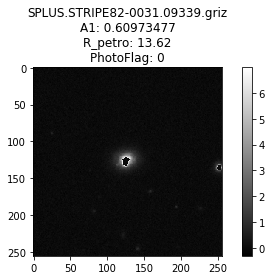

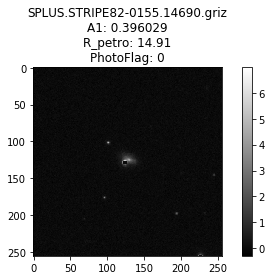

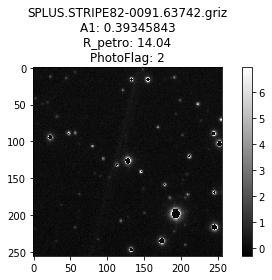

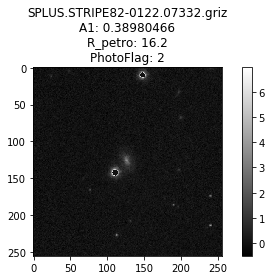

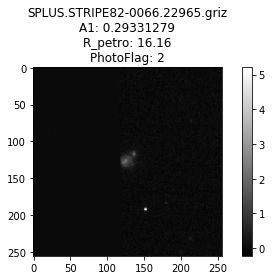

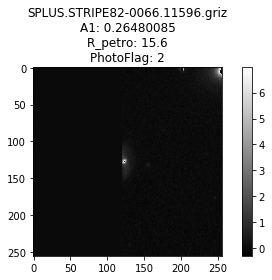

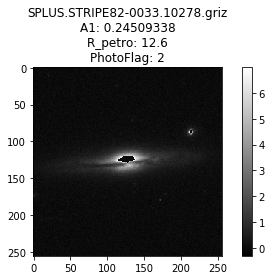

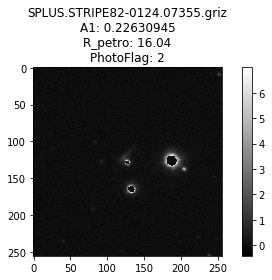

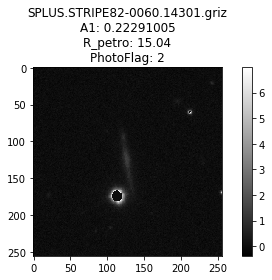

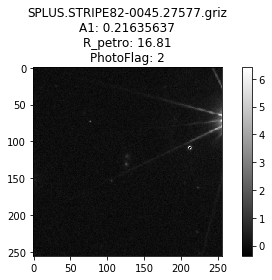

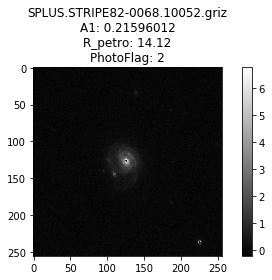

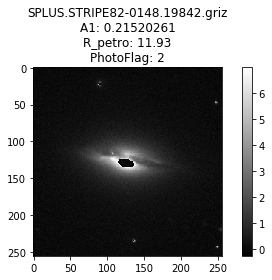

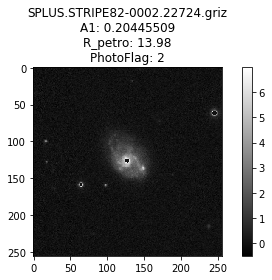

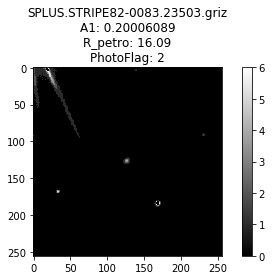

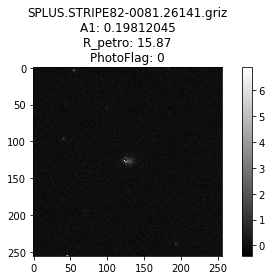

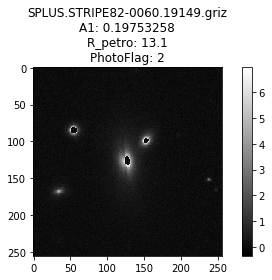

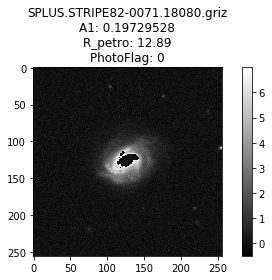

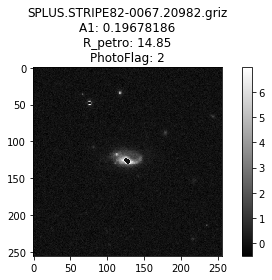

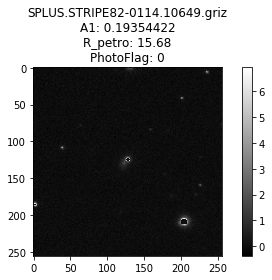

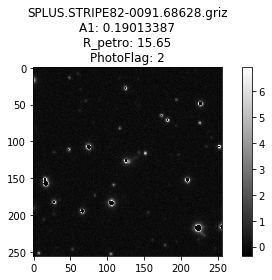

In [11]:
l = lambda x: x if x < 7 and x > -0.5 else 0
vector = np.vectorize(l)

for k in NQ.iterrows():
  im_array = fits.getdata(f'/media/informatica/Data/R_stamps/{k[1]["# rootname800"]}_R.fits')
  plt.title(k[1]["# rootname800"] + '\n' + 'A1: ' + str(k[1]['A1'])+ '\n' + 'R_petro: ' + str(k[1]['r_petro'])   + '\n' + 'PhotoFlag: ' + str(k[1]['PhotoFlag']) )
  plt.imshow(vector(im_array), cmap='gray')
  plt.colorbar()
  plt.tight_layout()
  plt.savefig('/media/informatica/Data/Projeto/' + k[1]["# rootname800"] + '.png')
  plt.show()


In [0]:
import shutil 
import os
for k in NQ.iterrows():
    Saida = (f'/media/informatica/Data/R_stamps/{k[1]["# rootname800"]}_R.fits')
    shutil.copy(Saida, '/media/informatica/Data/Projeto/')